<a href="https://colab.research.google.com/github/Rushi589/Deep_learning/blob/main/flat_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.shape

(29451, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df.isnull().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


In [ ]:
df.duplicated().sum()

np.int64(401)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(29050, 12)

In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
df.corr(numeric_only=True)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.364299,-0.042503,-0.004233,-1.000000,-0.346085,0.006420,-0.000850,0.054618
RERA,0.364299,1.000000,0.008403,-0.006251,-0.364299,-0.270268,0.103617,-0.065424,0.067314
BHK_NO.,-0.042503,0.008403,1.000000,0.005337,0.042503,0.013146,0.067711,0.046988,0.113654
SQUARE_FT,-0.004233,-0.006251,0.005337,1.000000,0.004233,0.001768,-0.012646,0.000813,0.409571
READY_TO_MOVE,-1.000000,-0.364299,0.042503,0.004233,1.000000,0.346085,-0.006420,0.000850,-0.054618
RESALE,-0.346085,-0.270268,0.013146,0.001768,0.346085,1.000000,0.023274,0.015824,-0.203275
LONGITUDE,0.006420,0.103617,0.067711,-0.012646,-0.006420,0.023274,1.000000,-0.156784,-0.030505
LATITUDE,-0.000850,-0.065424,0.046988,0.000813,0.000850,0.015824,-0.156784,1.000000,-0.017813
TARGET(PRICE_IN_LACS),0.054618,0.067314,0.113654,0.409571,-0.054618,-0.203275,-0.030505,-0.017813,1.000000


In [ ]:
for i in df.columns[df.dtypes=='object']:
  print(i,len(df[i].unique()))

POSTED_BY 3
BHK_OR_RK 2
ADDRESS 6899


In [ ]:
df['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [ ]:
df['BHK_OR_RK'].unique()

array(['BHK', 'RK'], dtype=object)

In [ ]:
for i in df.columns[df.dtypes!='object']:
  print(i,df[i].skew())

UNDER_CONSTRUCTION 1.6750764295911578
RERA 0.7922380081096811
BHK_NO. 2.411951352623418
SQUARE_FT 115.81290137888708
READY_TO_MOVE -1.6750764295911582
RESALE -3.381699815224578
LONGITUDE 0.18504012296909692
LATITUDE -10.322081949803959
TARGET(PRICE_IN_LACS) 17.971976026158366


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


UNDER_CONSTRUCTION 1.6750764295911578


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


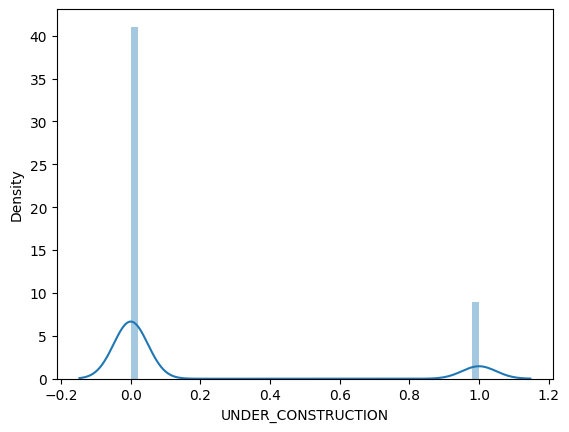

RERA 0.7922380081096811


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


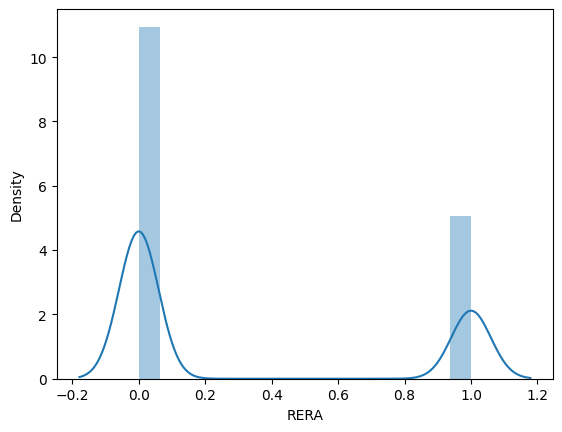

BHK_NO. 2.411951352623418


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


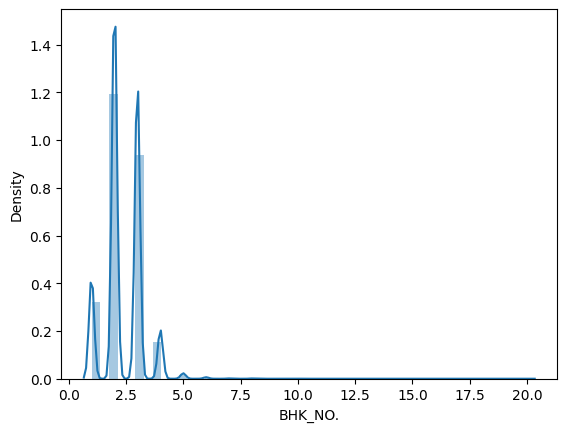

SQUARE_FT 115.81290137888708


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


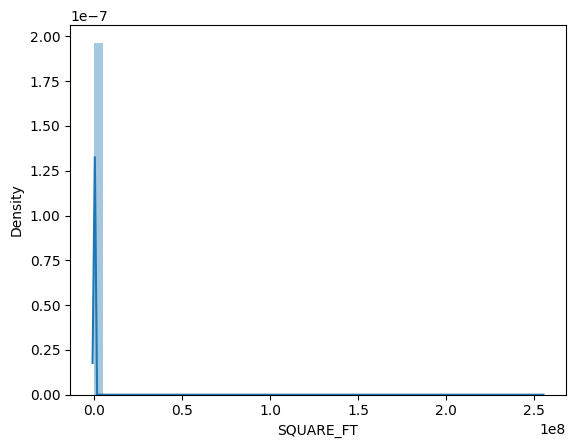

READY_TO_MOVE -1.6750764295911582


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


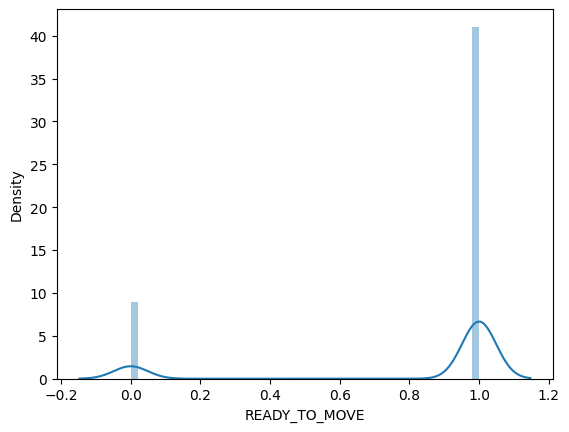

RESALE -3.381699815224578


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


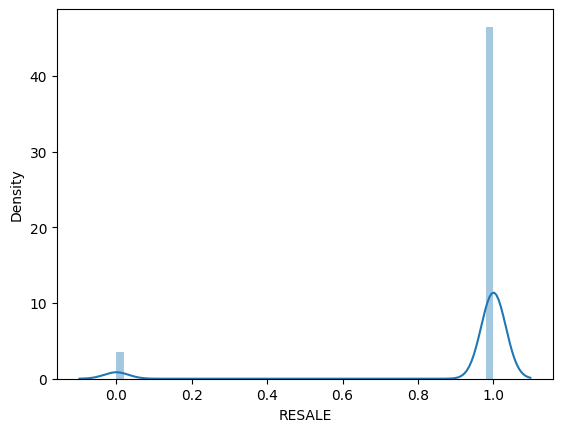

LONGITUDE 0.18504012296909692


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


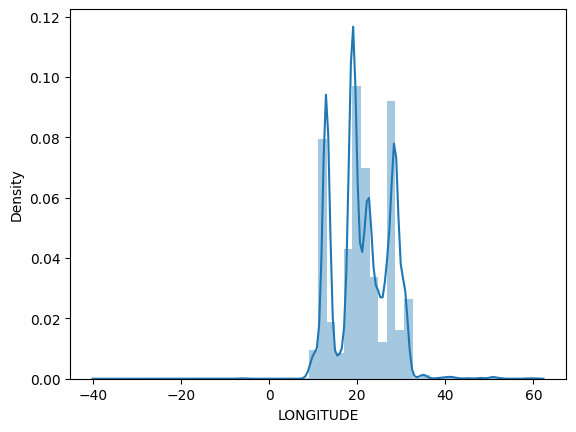

LATITUDE -10.322081949803959


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


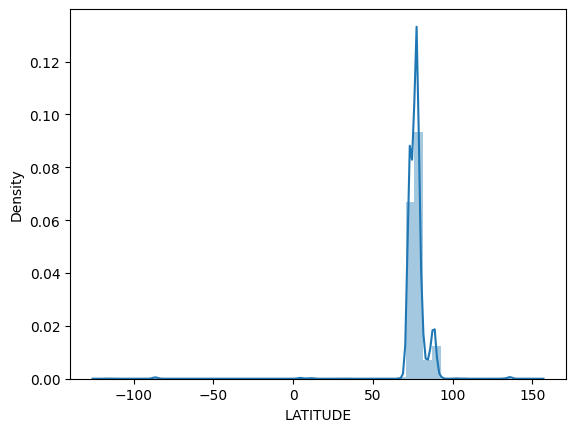

TARGET(PRICE_IN_LACS) 17.971976026158366


<ipython-input-69-14610539397b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


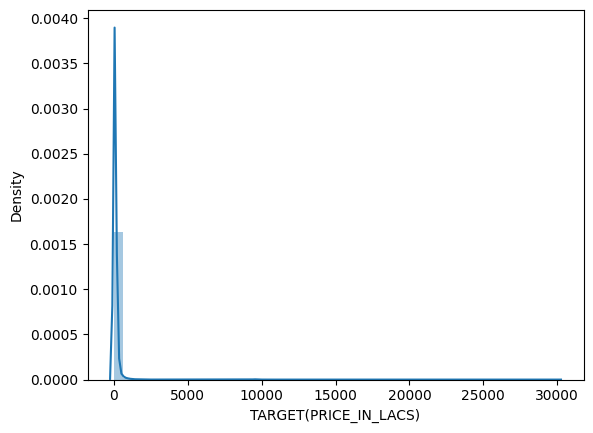

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  print(i,df[i].skew())
  sns.distplot(df[i])
  plt.show()

<Axes: ylabel='count'>

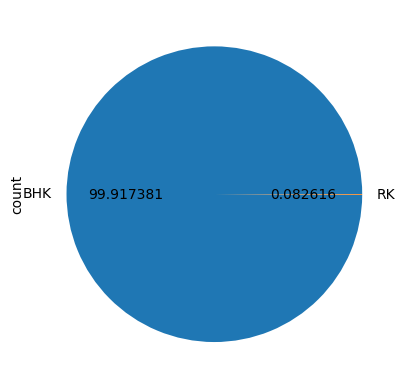

In [ ]:
df['BHK_OR_RK'].value_counts().plot(kind='pie',autopct='%2f')

<Axes: ylabel='count'>

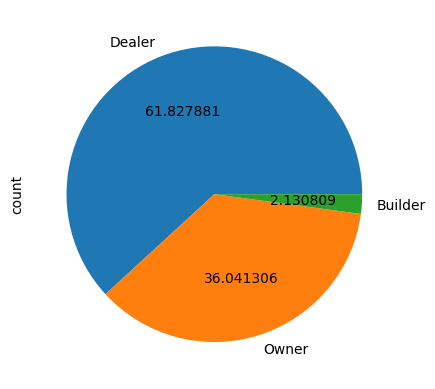

In [ ]:
df['POSTED_BY'].value_counts().plot(kind='pie',autopct='%2f')

In [ ]:
pd.crosstab(df['POSTED_BY'],df['RERA'])

RERA,0,1
POSTED_BY,,
Builder,201,418
Dealer,10736,7225
Owner,8937,1533


<Axes: xlabel='BHK_OR_RK', ylabel='Count'>

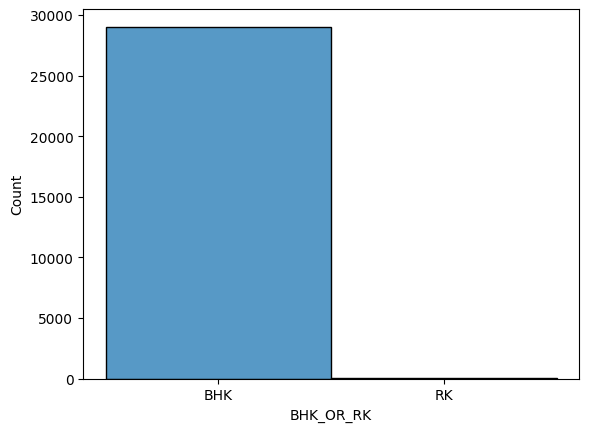

In [ ]:
sns.histplot(df['BHK_OR_RK'])

<Axes: xlabel='POSTED_BY', ylabel='Count'>

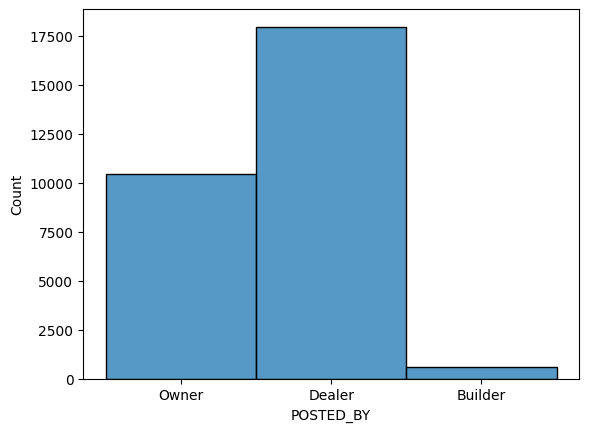

In [ ]:
sns.histplot(df['POSTED_BY'])

<Axes: xlabel='LATITUDE', ylabel='LONGITUDE'>

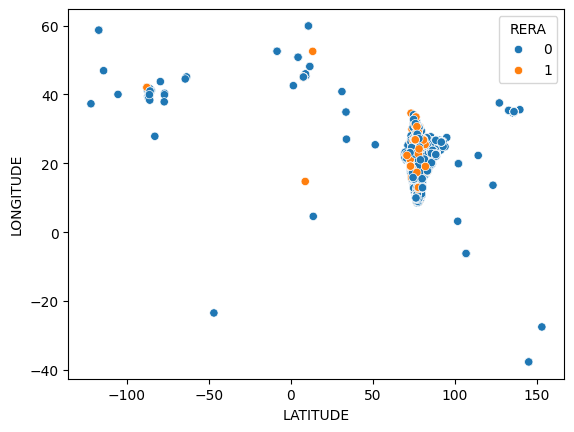

In [ ]:
sns.scatterplot(data=df,x=df['LATITUDE'],y=df['LONGITUDE'],hue=df['RERA'])

<Axes: xlabel='RERA', ylabel='POSTED_BY'>

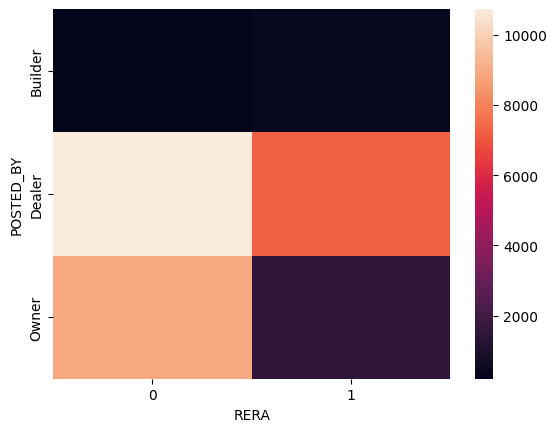

In [ ]:
sns.heatmap(pd.crosstab(df['POSTED_BY'],df['RERA']))

<Axes: xlabel='READY_TO_MOVE', ylabel='POSTED_BY'>

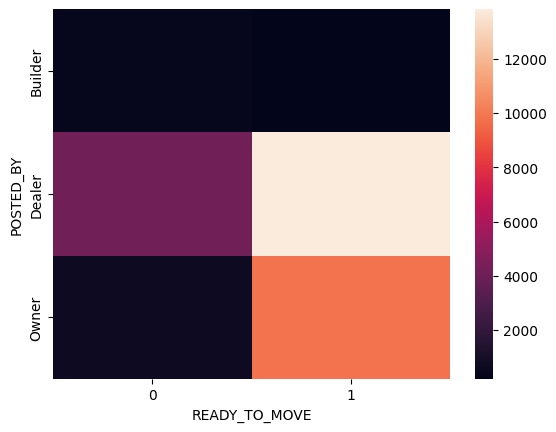

In [ ]:
sns.heatmap(pd.crosstab(df['POSTED_BY'],df['READY_TO_MOVE']))

In [ ]:
pd.crosstab(df['UNDER_CONSTRUCTION'],df['BHK_OR_RK'])

BHK_OR_RK,BHK,RK
UNDER_CONSTRUCTION,,
0,23838,13
1,5188,11


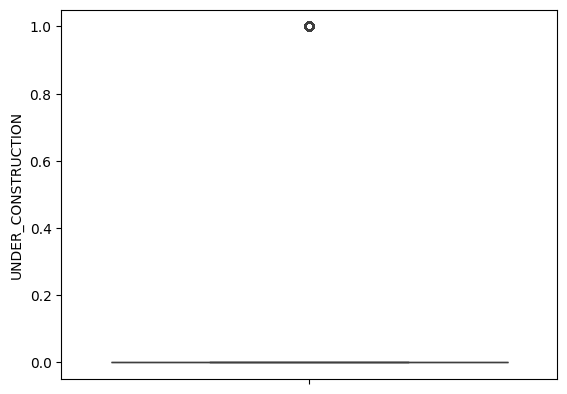

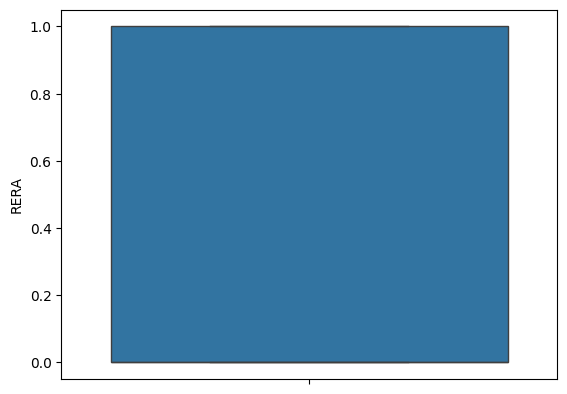

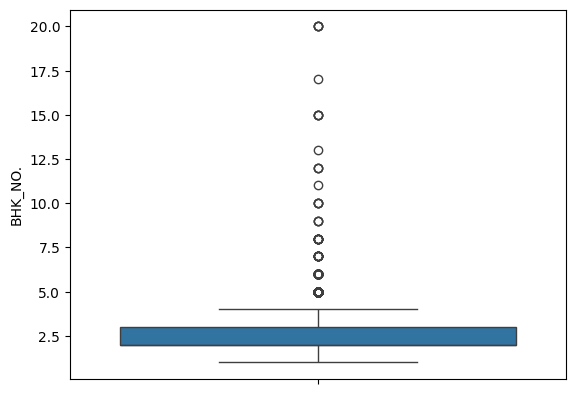

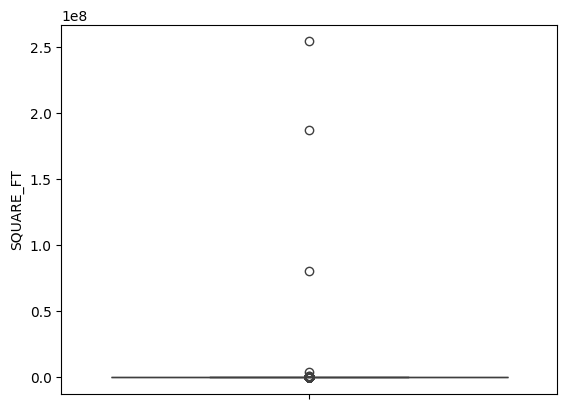

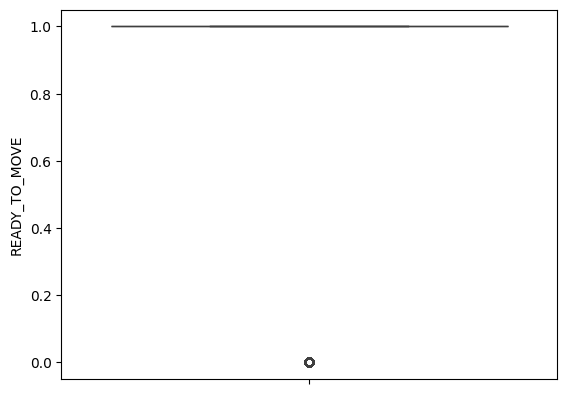

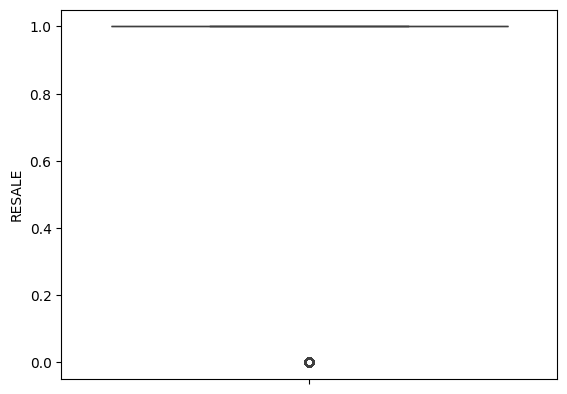

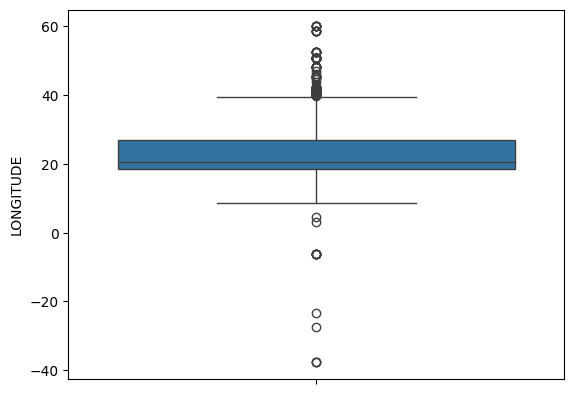

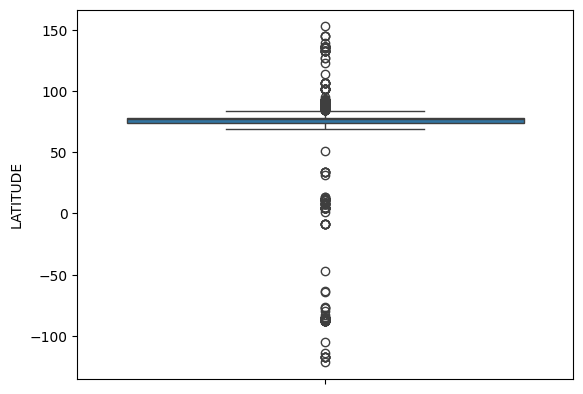

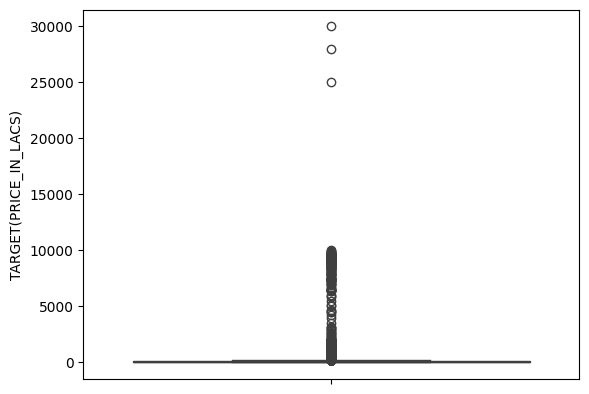

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [ ]:
df_out=['BHK_NO.','SQUARE_FT','LONGITUDE','LATITUDE','TARGET(PRICE_IN_LACS)']

In [ ]:
for i in df_out:
  quantile25=df[i].quantile(0.25)
  quantile75=df[i].quantile(0.75)
  iqr=quantile75-quantile25
  upper_limit=quantile75+1.5*iqr
  lower_limit=quantile25-1.5*iqr
  upp_per=((df[i]>=upper_limit).sum()/df.shape[0])*100
  low_per=((df[i]<=lower_limit).sum()/df.shape[0])*100

  print(i,upp_per,low_per)

BHK_NO. 0.9741824440619622 0.0
SQUARE_FT 5.549053356282272 0.0
LONGITUDE 0.44750430292598964 0.048192771084337345
LATITUDE 9.573149741824441 0.5266781411359724
TARGET(PRICE_IN_LACS) 10.481927710843374 0.0


In [ ]:
for i in df_out:
  quantile25=df[i].quantile(0.25)
  quantile75=df[i].quantile(0.75)
  iqr=quantile75-quantile25
  upper_limit=quantile75+1.5*iqr
  lower_limit=quantile25-1.5*iqr
  df[i]=np.where(df[i]>upper_limit,upper_limit,
                 np.where(df[i]<lower_limit,lower_limit,df[i]))

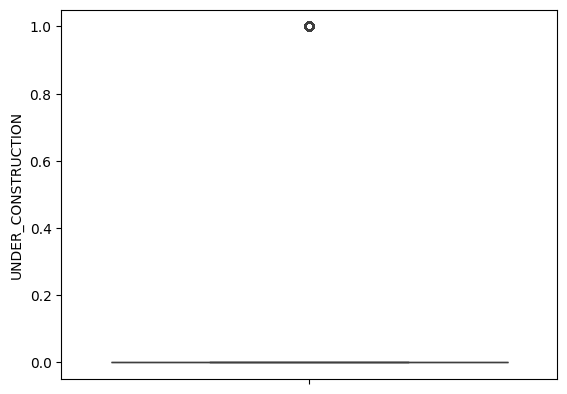

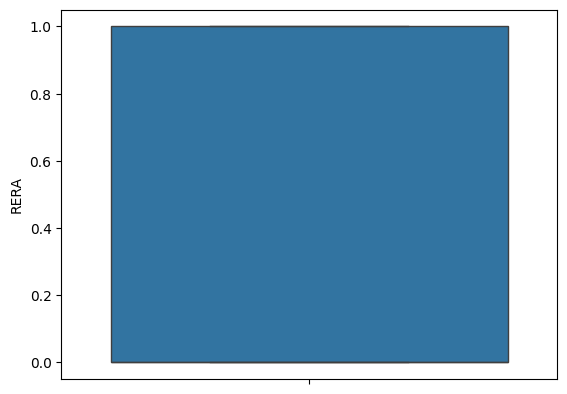

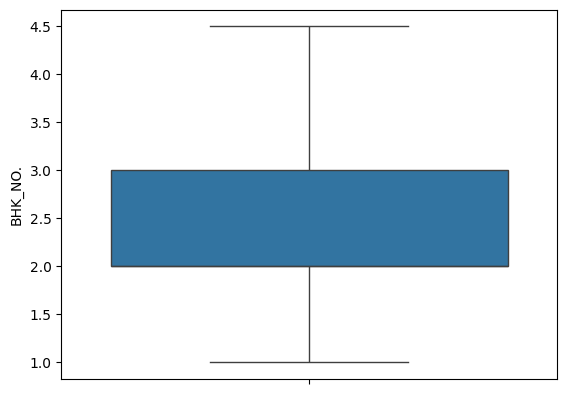

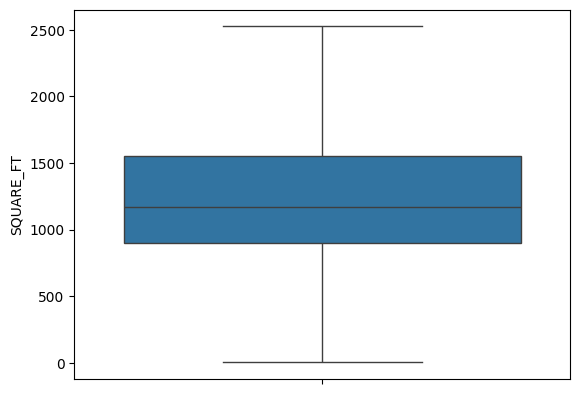

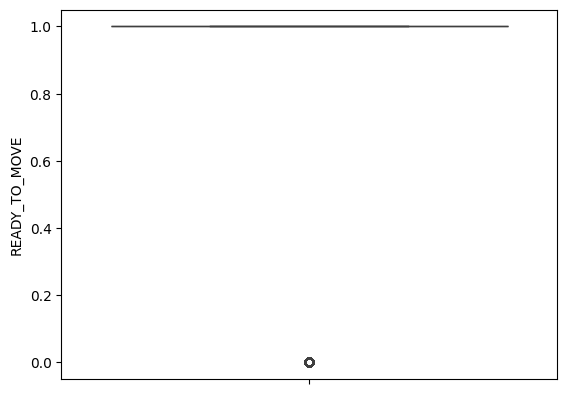

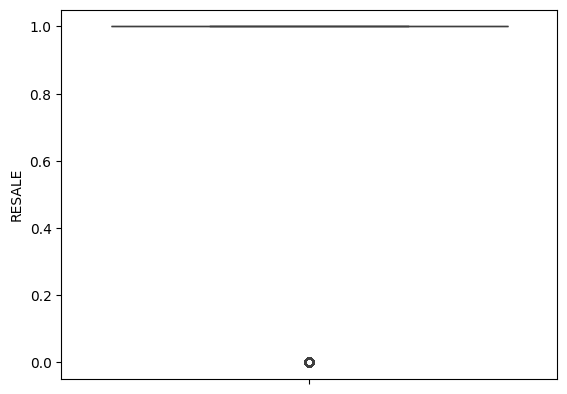

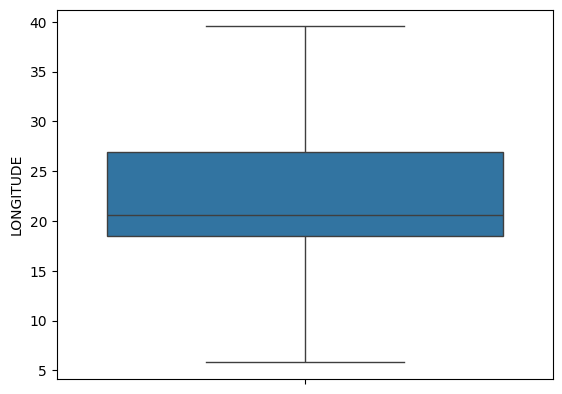

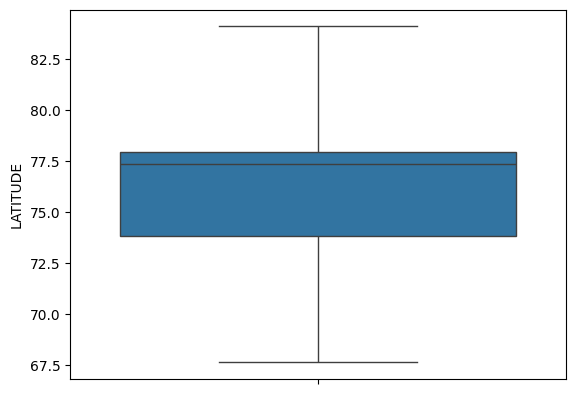

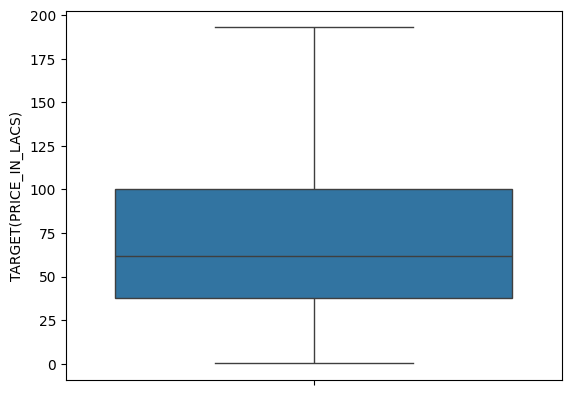

In [ ]:
for i in df.columns[df.dtypes!='object']:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,84.090134,60.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  float64
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 2.9+ MB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,11:]

In [ ]:
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,2.0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,Dealer,0,0,2.0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,Owner,0,0,2.0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,Owner,0,1,2.0,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,Dealer,1,0,2.0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,84.090134
...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3.0,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277
29447,Owner,0,0,2.0,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.538208,67.617599
29448,Dealer,0,0,2.0,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002
29449,Owner,0,0,2.0,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910


In [ ]:
y

,TARGET(PRICE_IN_LACS)
0,55.0
1,51.0
2,43.0
3,62.5
4,60.5
...,...
29446,45.0
29447,16.0
29448,27.1
29449,67.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23240, 11), (23240, 1), (5810, 11), (5810, 1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder,TargetEncoder

In [ ]:
oe=OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
te=TargetEncoder()

In [ ]:
oe_encode=["POSTED_BY","BHK_OR_RK"]
te_encode=["ADDRESS"]


In [ ]:
train_ohe=oe.fit_transform(X_train[oe_encode])
test_ohe=oe.transform(X_test[oe_encode])

In [ ]:
train_ohe_concat=pd.DataFrame(train_ohe,columns=oe.get_feature_names_out(["POSTED_BY","BHK_OR_RK"]))
test_ohe_concat=pd.DataFrame(test_ohe,columns=oe.get_feature_names_out(["POSTED_BY","BHK_OR_RK"]))

In [ ]:
X_train.drop(columns=oe_encode,inplace=True)
X_test.drop(columns=oe_encode,inplace=True)

In [ ]:
train_te=te.fit_transform(X_train[te_encode],y_train)
test_te=te.transform(X_test[te_encode])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
train_te_concat=pd.DataFrame(train_te,columns=te.get_feature_names_out(["ADDRESS"]))
test_te_concat=pd.DataFrame(test_te,columns=te.get_feature_names_out(["ADDRESS"]))

In [ ]:
X_train.drop(columns=te_encode,inplace=True)
X_test.drop(columns=te_encode,inplace=True)


In [ ]:
X_train

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
25209,0,1,1.0,699.980556,1,1,21.561280,74.212380
24988,0,0,2.0,850.008854,1,1,18.960000,72.820000
5054,0,0,2.0,900.151286,1,1,28.537227,77.370417
16093,0,0,2.0,725.094578,1,1,22.330100,73.161100
14810,0,0,2.0,1200.000000,1,1,30.740000,76.650000
...,...,...,...,...,...,...,...,...
21820,0,0,4.0,2311.070025,1,1,21.170000,72.830000
5403,1,1,2.0,760.005578,0,1,18.585300,73.741300
860,1,1,2.0,1267.719258,0,1,18.097689,74.735239
15922,0,1,2.0,939.769329,1,1,23.160830,77.468330


In [ ]:
X_train=pd.concat([X_train.reset_index(drop=True),train_ohe_concat.reset_index(drop=True),train_te_concat.reset_index(drop=True)],axis=1)
X_test=pd.concat([X_test.reset_index(drop=True),test_ohe_concat.reset_index(drop=True),test_te_concat.reset_index(drop=True)],axis=1)

In [ ]:
X_train

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,ADDRESS
0,0,1,1.0,699.980556,1,1,21.561280,74.212380,1.0,0.0,0.0,47.515830
1,0,0,2.0,850.008854,1,1,18.960000,72.820000,1.0,0.0,0.0,102.867600
2,0,0,2.0,900.151286,1,1,28.537227,77.370417,1.0,0.0,0.0,153.569984
3,0,0,2.0,725.094578,1,1,22.330100,73.161100,0.0,1.0,0.0,29.575762
4,0,0,2.0,1200.000000,1,1,30.740000,76.650000,0.0,1.0,0.0,31.178861
...,...,...,...,...,...,...,...,...,...,...,...,...
23235,0,0,4.0,2311.070025,1,1,21.170000,72.830000,1.0,0.0,0.0,100.874881
23236,1,1,2.0,760.005578,0,1,18.585300,73.741300,1.0,0.0,0.0,72.021557
23237,1,1,2.0,1267.719258,0,1,18.097689,74.735239,1.0,0.0,0.0,97.091282
23238,0,1,2.0,939.769329,1,1,23.160830,77.468330,0.0,1.0,0.0,23.764541


In [ ]:
X_test

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,ADDRESS
0,0,0,2.0,1291.781043,1,1,23.213646,72.634708,0.0,1.0,0.0,79.546800
1,1,1,3.0,1504.651163,0,1,30.662283,76.822397,1.0,0.0,0.0,56.201744
2,0,0,2.0,1250.000000,1,1,12.970210,77.560290,0.0,1.0,0.0,79.546800
3,1,1,3.0,1677.468547,0,1,18.914541,72.818211,1.0,0.0,0.0,162.329557
4,1,1,2.0,610.241443,0,0,18.595456,73.946088,0.0,0.0,0.0,44.097236
...,...,...,...,...,...,...,...,...,...,...,...,...
5805,0,0,3.0,1078.260870,1,1,22.498882,84.090134,1.0,0.0,0.0,46.663483
5806,0,0,3.0,1915.144372,1,1,30.697795,76.714722,1.0,0.0,0.0,113.091390
5807,0,0,3.0,1522.815032,1,1,19.239813,72.962722,1.0,0.0,0.0,160.439233
5808,0,0,3.0,1563.042723,1,1,28.588293,77.369224,0.0,1.0,0.0,74.785602


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23240, 12), (5810, 12), (23240, 1), (5810, 1))

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
from keras.layers import *
from keras import regularizers
from keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model=Sequential()
model.add(Dense(12,input_dim=12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='Adam', loss='huber', metrics=['r2_score'])

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 57.0586 - r2_score: -0.9604 - val_loss: 18.9698 - val_r2_score: 0.7290
Epoch 2/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.9890 - r2_score: 0.7359 - val_loss: 18.0776 - val_r2_score: 0.7495
Epoch 3/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.1031 - r2_score: 0.7520 - val_loss: 17.8568 - val_r2_score: 0.7580
Epoch 4/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 18.0679 - r2_score: 0.7577 - val_loss: 17.7796 - val_r2_score: 0.7594
Epoch 5/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.7639 - r2_score: 0.7588 - val_loss: 17.3739 - val_r2_score: 0.7657
Epoch 6/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17.6269 - r2_score: 0.7624 - val_loss: 17.2715 - val_r2_score: 0.7666
Epoch 7/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 17.6875 - r2_score: 0.7676 - val_loss: 17.1499 - val_r2_score: 0.7714
Epoch 8/100
727/727 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 17.3543 - r2_score: 0

In [ ]:
y_pred=model.predict(X_test)

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7981547713279724

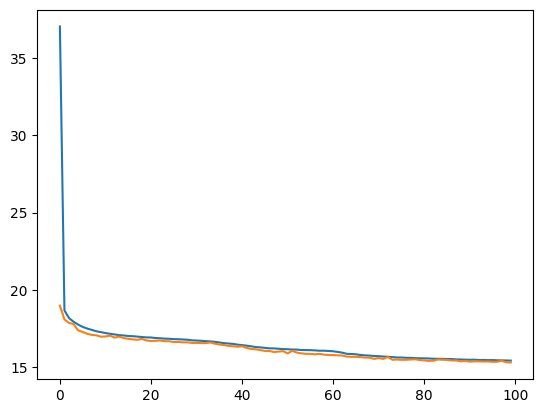

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

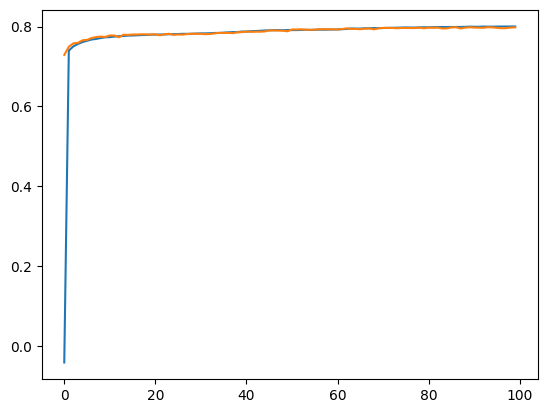

In [ ]:
plt.plot(history.history['r2_score'])
plt.plot(history.history['val_r2_score'])